In [3]:
import pandas as pd
iowa2015 = pd.read_csv('iowa2015_model_data.csv')
iowa2016 = pd.read_csv('iowa2015_model_data.csv')

In [7]:
pd.options.display.max_columns = 100

iowa2015.dropna(inplace=True)
iowa2015.head()

,Store Number,Annual Sale(Dollars),Sale (Dollars)(JAN),Volume Sold (Liters)(JAN),Bottles Sold(JAN),AVG Bottle Vol (ml)(JAN),AVG State Bottle Cost(JAN),AVG State Bottle Retail(JAN),AVG State Markup(JAN),Sale (Dollars)(FEB),Volume Sold (Liters)(FEB),Bottles Sold(FEB),AVG Bottle Vol (ml)(FEB),AVG State Bottle Cost(FEB),AVG State Bottle Retail(FEB),AVG State Markup(FEB),Sale (Dollars)(MAR),Volume Sold (Liters)(MAR),Bottles Sold(MAR),AVG Bottle Vol (ml)(MAR),AVG State Bottle Cost(MAR),AVG State Bottle Retail(MAR),AVG State Markup(MAR),Sale (Dollars)(APR),Volume Sold (Liters)(APR),Bottles Sold(APR),AVG Bottle Vol (ml)(APR),AVG State Bottle Cost(APR),AVG State Bottle Retail(APR),AVG State Markup(APR),Sale (Dollars)(MAY),Volume Sold (Liters)(MAY),Bottles Sold(MAY),AVG Bottle Vol (ml)(MAY),AVG State Bottle Cost(MAY),AVG State Bottle Retail(MAY),AVG State Markup(MAY),Sale (Dollars)(JUN),Volume Sold (Liters)(JUN),Bottles Sold(JUN),AVG Bottle Vol (ml)(JUN),AVG State Bottle Cost(JUN),AVG State Bottle Retail(JUN),AVG State Markup(JUN),Sale (Dollars)(JUL),Volume Sold (Liters)(JUL),Bottles Sold(JUL),AVG Bottle Vol (ml)(JUL),AVG State Bottle Cost(JUL),AVG State Bottle Retail(JUL),AVG State Markup(JUL),Sale (Dollars)(AUG),Volume Sold (Liters)(AUG),Bottles Sold(AUG),AVG Bottle Vol (ml)(AUG),AVG State Bottle Cost(AUG),AVG State Bottle Retail(AUG),AVG State Markup(AUG),Sale (Dollars)(SEP),Volume Sold (Liters)(SEP),Bottles Sold(SEP),AVG Bottle Vol (ml)(SEP),AVG State Bottle Cost(SEP),AVG State Bottle Retail(SEP),AVG State Markup(SEP),Sale (Dollars)(OCT),Volume Sold (Liters)(OCT),Bottles Sold(OCT),AVG Bottle Vol (ml)(OCT),AVG State Bottle Cost(OCT),AVG State Bottle Retail(OCT),AVG State Markup(OCT),Sale (Dollars)(NOV),Volume Sold (Liters)(NOV),Bottles Sold(NOV),AVG Bottle Vol (ml)(NOV),AVG State Bottle Cost(NOV),AVG State Bottle Retail(NOV),AVG State Markup(NOV),Sale (Dollars)(DEC),Volume Sold (Liters)(DEC),Bottles Sold(DEC),AVG Bottle Vol (ml)(DEC),AVG State Bottle Cost(DEC),AVG State Bottle Retail(DEC),AVG State Markup(DEC),City,County
0,9001,191820.12,17704.80,438.75,606.0,750.000000,19.953889,29.932778,0.500111,6702.90,209.25,294.0,647.727273,15.185455,22.780909,0.500182,18354.54,441.00,604.0,712.500000,16.907000,25.362500,0.500100,11865.60,366.75,520.0,708.333333,16.693704,25.042593,0.500111,12169.62,378.00,532.0,715.909091,17.455455,26.185909,0.500136,8000.46,238.50,332.0,718.750000,17.864167,26.798333,0.500167,19818.30,587.25,816.0,723.214286,18.761429,28.143929,0.500107,23688.18,571.50,778.0,715.909091,16.806818,25.212273,0.500136,16413.96,501.75,716.0,708.333333,17.454444,26.183889,0.500111,15371.64,373.50,516.0,731.250000,20.938000,31.409500,0.500000,20859.66,474.75,642.0,700.000000,16.075333,24.114667,0.500067,20870.46,598.50,830.0,750.000000,18.871333,28.309000,0.500067,SWISHER,Johnson
1,9002,327676.62,7780.02,225.00,318.0,690.789474,16.298421,24.451579,0.500158,13381.44,387.00,552.0,715.909091,15.985909,23.983182,0.500091,23474.82,670.50,1242.0,639.705882,14.498235,21.751765,0.500294,24295.98,706.50,1230.0,664.285714,14.940286,22.414857,0.500229,24271.50,720.00,1278.0,616.071429,13.732500,20.603214,0.500357,31124.74,888.00,1746.0,610.714286,13.661714,20.496857,0.500371,33127.76,1002.74,1960.0,590.625000,13.096000,19.648500,0.500425,26809.98,805.50,1494.0,597.656250,12.971875,19.462500,0.500406,26348.52,922.50,1506.0,633.620690,13.336552,20.009310,0.500310,44230.20,1458.00,2478.0,615.000000,13.560200,20.344400,0.500260,36242.04,1233.00,2052.0,606.382979,13.498511,20.251915,0.500298,36589.62,1273.88,1981.0,585.365854,12.869024,19.307561,0.500317,LECLAIRE,Scott
2,9010,26209.38,1883.88,72.00,96.0,750.000000,13.180000,19.774000,0.500000,4686.72,180.00,252.0,715.909091,12.697273,19.050000,0.500091,5137.02,214.50,286.0,750.000000,12.100833,18.154167,0.500000,1407.36,63.00,84.0,750.000000,12.150000,18.227500,0.500000,3520.08,144.00,192.0,750.000000,12.721000,19.085000,0.500000,3082.80,126.00,168.0,750.000000,13.180000,19.774000,0.500000,1135.08

In [14]:
fit_features = list(iowa2015)

fit_features = fit_features[0:23]+fit_features[-2:]

iowa2015_fit= iowa2015[fit_features]



Im choosing a standardization technique as it looks like alot of annual sales fall in the same region.  There is a relatively normal distribution with a right skew from a select handful of extremely well performing stores.  The standardization will help with allowing outlier information to help with the identification of these extremely high performing scenarios.

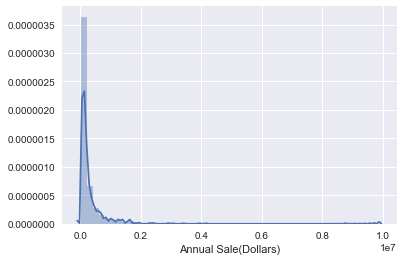

In [16]:
import seaborn as sns
% matplotlib inline
sns.distplot(iowa2015_fit['Annual Sale(Dollars)'])

In [27]:
#iowa2015_fit.set_index(keys = 'Store Number', inplace=True)

#iowa2015_scale = iowa2015_fit.drop(['Annual Sale(Dollars)','City','County'], axis=1)






'''Scaling removes the labels and the fucking index!'''

from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
iowa2015_scaled = pd.DataFrame(SS.fit_transform(iowa2015_scale))

iowa2015_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.008805,-0.329861,-0.305386,-0.895673,5.825619,5.819572,-1.081151,-0.310328,-0.441429,-0.447705,-1.415093,3.072296,3.064279,-1.503968,-0.068261,-0.322047,-0.314817,-1.101519,4.106721,4.096566,-1.160267
1,-0.244165,-0.418005,-0.422163,-1.201239,3.871696,3.867066,-1.052190,-0.155827,-0.376350,-0.351334,-1.074348,3.478015,3.470464,-1.552183,0.026914,-0.251803,-0.121162,-1.462820,2.829008,2.821313,-1.038217
2,-0.394449,-0.481099,-0.512178,-0.895673,2.204835,2.200825,-1.149931,-0.356970,-0.452138,-0.463394,-1.074348,1.811134,1.803802,-1.552183,-0.313946,-0.391373,-0.411340,-0.915394,1.557322,1.550699,-1.223142
3,2.356074,2.424016,2.522396,-0.068974,0.991911,0.989517,-0.659474,2.195954,2.166234,2.365001,-0.181822,1.110312,1.108462,-0.253272,1.678542,1.797876,1.903405,-0.249109,0.799766,0.797423,-0.330682
4,-0.246565,-0.277081,-0.319578,0.213231,0.782700,0.782297,-0.055130,-0.316917,-0.343772,-0.371505,0.112020,0.716361,0.717159,0.142229,-0.256120,-0.285208,-0.331511,0.048016,0.861266,0.855379,-1.008448


In [25]:
iowa2015_scaled.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [17]:
# creating X and y variables
X = iowa2015.drop(['Store Number','Annual Sale(Dollars)'],axis =1)
y = iowa2015['Annual Sale(Dollars)']

In [19]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SSX = SS.fit_transform(X)

ValueError: could not convert string to float: Scott